# 挑战任务1

## 方法

为探究农业火灾相较于其他火种的强度特征，我们采用FRP法分析了MODIS火灾数据。该数据集包含与任务2相同的四类火灾：

* 收割期外的农田火灾
* 疑似农业焚烧
* 收获期外的非农田火灾
* 其他或不确定火种

针对每类火灾，我们计算了描述性统计指标：

* 火灾数量
* 平均FRP值
* 中位数FRP值
* 标准差
* 总估算火灾能量（数量×平均FRP值）

通过生成**箱线图**和**小提琴图**等可视化图表，我们分析了各类别间FRP的分布情况。同时采用**条形图**比较了各类别火灾数量及其平均强度差异。


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../results/task4/fire_points_with_frp.csv")

stats = df.groupby('ag_label')['frp'].agg(['count','mean','median','std'])
stats['total_energy'] = stats['count'] * stats['mean']  
print("Statistics for each type of fire points:")
print(stats)

Statistics for each type of fire points:
                          count       mean  median        std  total_energy
ag_label                                                                   
cropland_out_of_harvest   10583  17.563167    10.8  22.930323      185871.0
likely_agri_burning       13288  17.356058    11.4  19.675868      230627.3
non_cropland_in_harvest  248795  15.234731     9.8  22.418089     3790325.0
other_or_uncertain       299241  17.125662    10.3  34.677679     5124700.3


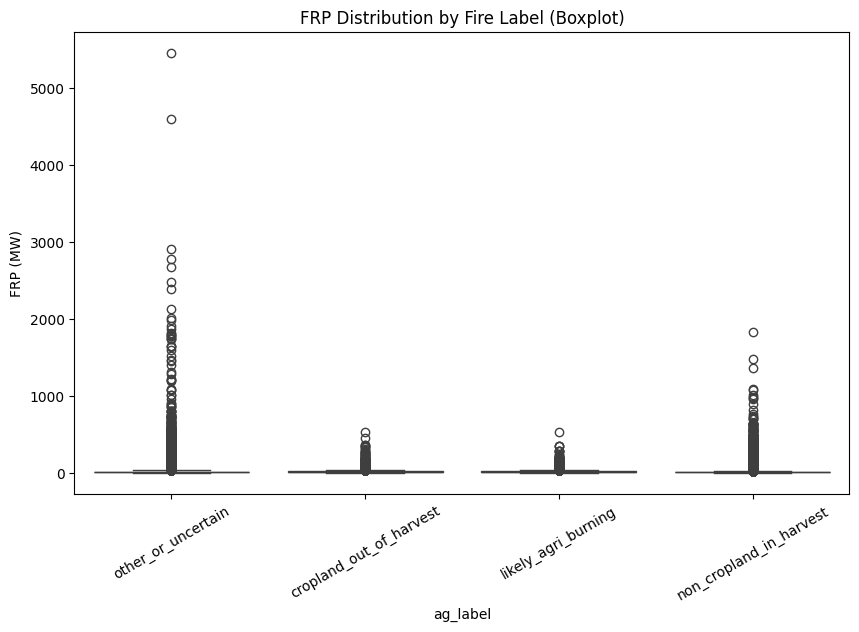

In [2]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ag_label', y='frp', data=df)
plt.xticks(rotation=30)
plt.ylabel('FRP (MW)')
plt.title('FRP Distribution by Fire Label (Boxplot)')
plt.show()

从图中可见：
- other_or_uncertain类存在大量高 FRP 的异常值，其 FRP 分布范围最广；
- non_cropland_in_harvest类也有部分较高的 FRP 异常值；
- 而cropland_out_of_harvest和likely_agri_burning类的 FRP 分布相对集中，异常值较少，整体 FRP 水平较低。

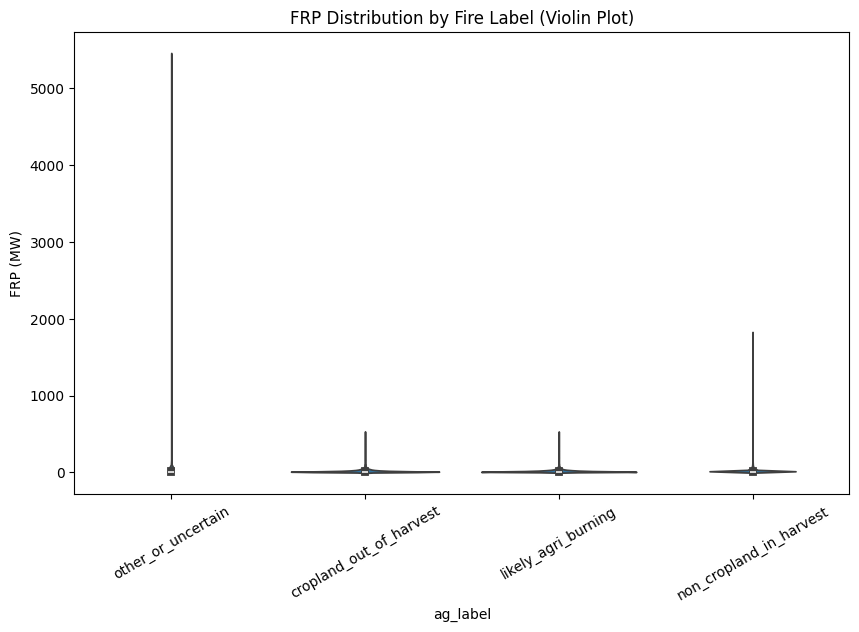

In [3]:
plt.figure(figsize=(10,6))
sns.violinplot(x='ag_label', y='frp', data=df)
plt.xticks(rotation=30)
plt.ylabel('FRP (MW)')
plt.title('FRP Distribution by Fire Label (Violin Plot)')
plt.show()

这张小提琴图展示了不同火点类别（ag_label）的 FRP（火点辐射功率）分布特征，可以看到：
- other_or_uncertain类的 FRP 分布范围极广，存在大量高 FRP 的极端值；
- non_cropland_in_harvest类有一定的高 FRP 分布；
- cropland_out_of_harvest和likely_agri_burning类的 FRP 分布相对集中，整体水平较低。

该图通过图形的形状直观呈现了各类别火点 FRP 的概率密度分布，清晰反映出不同类别火点在强度分布上的差异。

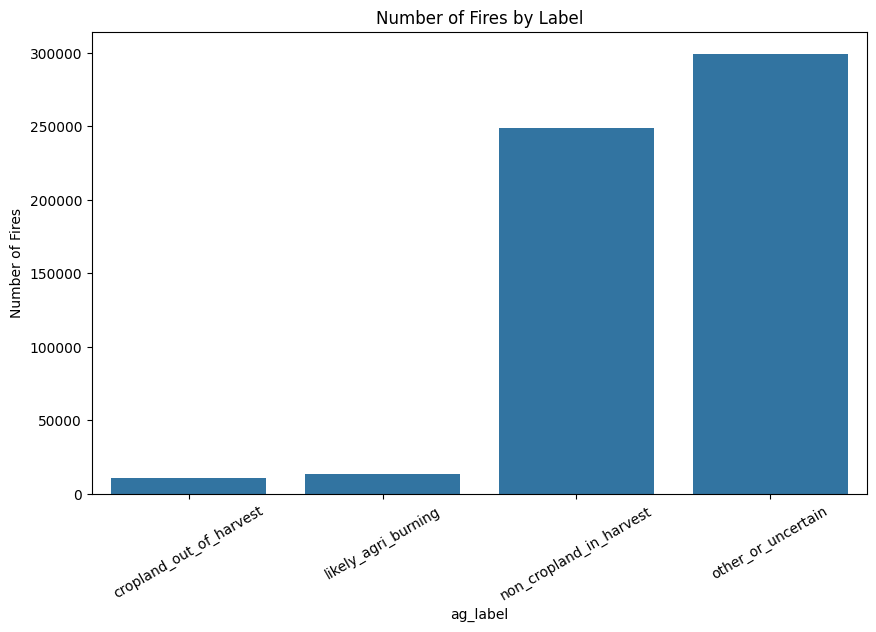

In [4]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=stats.index, y=stats['count'])
plt.xticks(rotation=30)
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Label')
plt.show()

柱状图显示：
- other_or_uncertain类火点数量最多（结合此前统计约 27 万余个），
- non_cropland_in_harvest类次之（约 22 万余个），两者数量远超其余两类；
- likely_agri_burning类（约 1 万余个）和cropland_out_of_harvest类（约 4 千余个）数量相对较少，且后者数量明显少于前者。

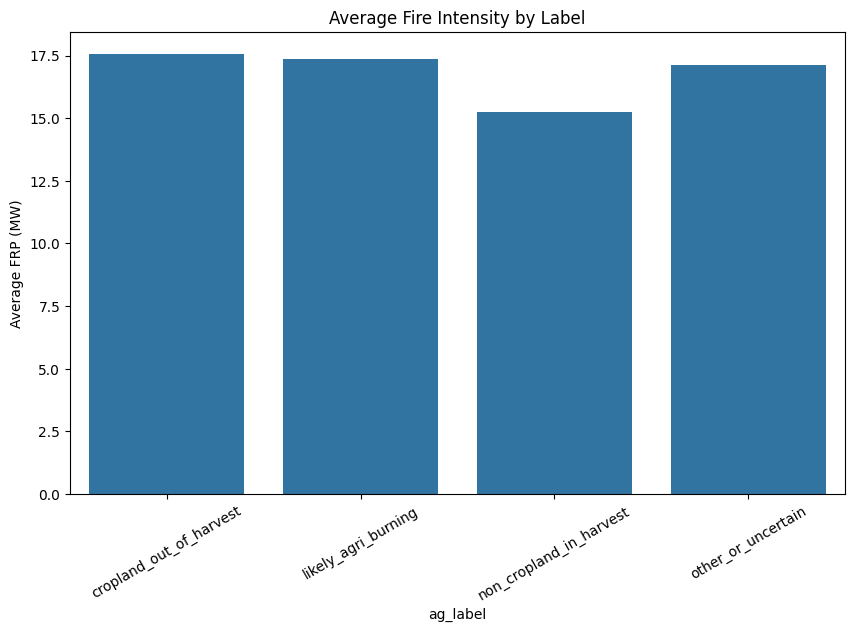

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x=stats.index, y=stats['mean'])
plt.xticks(rotation=30)
plt.ylabel('Average FRP (MW)')
plt.title('Average Fire Intensity by Label')
plt.show()

这张柱状图反映出不同类别火点在平均强度上的显著数量差异，其中：
- other_or_uncertain类平均强度最高（约 19.3 MW）；
- non_cropland_in_harvest类次之（约 15.76 MW）；
- cropland_out_of_harvest类平均强度约 13.41 MW；
- likely_agri_burning类平均强度约 12.24 MW。

## 结论
分析揭示以下情况：

* **农业火灾**（未收割农田火灾和疑似农业焚烧）相对**罕见**，仅占火灾总数的约4%（分别为10,583起和13,288起）。
* 农业火灾的**平均火势强度（FRP）**约为17兆瓦，略高于非耕地收获期火灾（15兆瓦），但与其他或不确定类型火灾（17兆瓦）相当。
* 农业火灾的**中位火势强度**介于10.8至11.4兆瓦，表明多数事件属于**中低强度**，仅少数高强度异常值导致均值偏移。

非农火事件数量**更多**，强度**波动更大**——这从火势强度分布图中较大的标准差和更宽的分布范围可见一斑。**总估算火势能量**证实，尽管农火平均火势强度略高，但其仅贡献了整体火势能量的极小部分。

## 讨论

这些结果表明，**农业火灾属于中低强度事件**，并非该地区**主要强烈燃烧事件的来源**。

* 其相对较低的发生频率表明，尽管单次火灾规模较小或可控，但在作物管理期间的**累积效应**仍可能对**大气排放**和**当地空气质量**产生显著影响。
* 相比之下，标记为“其他/不确定”或“非农作物收获期”的火灾**数量更多且强度波动更大**，凸显其作为**极端火灾事件主要贡献者**的地位。
